# Two Layer Neural Network
# hyperparameter tuning
This new notebook is to:
1. clean up the cs231n official note
2. isolate the tuning part of the work.

In [2]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import copy
import time

from cs231n.classifiers.neural_net import TwoLayerNet
from cs231n.classifiers.neural_net_tunning import hyper_params_comb, net_tuning

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# some of the functions that might come in handy later
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
# load CIFAR-10 data
from cs231n.data_utils import load_CIFAR10, get_CIFAR10_data

data_set = get_CIFAR10_data()

In [4]:
# unpack the data
# re-run this to reload X_train and y_train
X_train = data_set['X_train']
y_train = data_set['y_train']
X_val = data_set['X_val']
y_val = data_set['y_val']
X_test = data_set['X_test']
y_test = data_set['y_test']

# check dimensions
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [5]:
# build the developing dataset
num_dev = 500
mask_dev = np.random.choice(X_train.shape[0], num_dev, replace=False)
X_dev = X_train[mask_dev]
y_dev = y_train[mask_dev]
print('Dev data shape: ', X_dev.shape)
print('Dev labels shape: ', y_dev.shape)

# use developing data if dev_mode is on
dev_mode = False  # developing mode flag: True(on) or False(off)
if dev_mode:
    X_train = X_dev
    y_train = y_dev
    print('Notice: using dev dataset!')
else:
    print('Caution: using full training dataset!')

Dev data shape:  (500, 3072)
Dev labels shape:  (500,)
Caution: using full training dataset!


**Note that all list/array of hyperparameters are arranged in the order of:  
[hidden_size, learning_rate, num_epochs, reg]**

### 0. Computation speed comparison: gcloud vs macbook
The quotas on this gcloud VM instance is:
- 8 vCPU(s): Intel Xeon @ 2.2 GHz
- RAM: 30GB
- ROM: 10GB persistent disk

On Macbook:  
- 1 CPU: Intel(R) Core(TM) i5-5250U CPU @ 1.60GHz
- 4GB 1600MHz DDR3

The following section tests actual running time of training 5 epochs, averaged over 5 runs.

In [7]:
hidden_size_range = [204]
learning_rate_range = [1e-3]
num_epochs_range = [5, 5, 5, 5, 5]
reg_range = [0.25]

hyper_params_range = [hidden_size_range, learning_rate_range, num_epochs_range, reg_range]
hyper_params_list = hyper_params_comb(hyper_params_range)

tic = time.time()
best_net, results = net_tuning(X_train, y_train, 
                               X_val, y_val, 
                               hyper_params_list, verbose=False)
toc = time.time()

# time
total_time = float(toc-tic)
avg_time = total_time / len(hyper_params_list)
print('Time elapsed: %f' % (toc-tic))
print('Average per 5-epochs: %f' % (avg_time))
print()

Hyperparameter combinations completed: 1 / 5
Hyperparameter combinations completed: 2 / 5
Hyperparameter combinations completed: 3 / 5
Hyperparameter combinations completed: 4 / 5
Hyperparameter combinations completed: 5 / 5
Best training accuracy achieved: 0.526918
Best validation accuracy achieved: 0.504000

Hyperparamters of the best net:
hidden size: 204
learning rate: 0.001000
number of epochs: 5
regularisation strength: 0.250000

Time elapsed: 156.739929
Average per 5-epochs: %f



In [10]:
print(avg_time)

31.347985887527464


Results (train + val time per 5 epochs):  
- on macbook: 
- on gcloud VM: 31.35 seconds

### 1. **Hidden size tuning:**  
Coarse tuning:  
- tried [100~300] for 10 evenly spaced numbers
- best validation accuracy: 0.513000 @ H = 210
- best training accuracy: 0.533612

Fine tuning:  
- try [200 - 220] every one
- best validation accuracy:   @ H = 204
- best training accuracy:


In [ ]:
# # 1.1 hidden size: coarse search
# # set range of tuning for hyperparameters
# hidden_size_range = np.arange(201, 221, 1)
# learning_rate_range = [1e-3]
# num_epochs_range = [5]
# reg_range = [0.25]
# # drop = 1  # single on/off flag
# # drop_prob = 0.5


# hyper_params_range = [hidden_size_range, 
#                       learning_rate_range, 
#                       num_epochs_range, 
#                       reg_range]

# # net model tuning
# hyper_params_list = hyper_params_comb(hyper_params_range)
# print('Number of hyperparms to tune: %d' % len(hyper_params_list))
# tic = time.time()
# best_net, results = net_tuning(X_train, y_train, 
#                                X_val, y_val, 
#                                hyper_params_list, verbose=False)
# toc = time.time()

# # time
# print()
# print('Number of hyperparams to tune: %d' % len(hyper_params_list))
# print('Total time used: %f (seconds)' % (toc-tic))
# print('Total time per hyperparam: %f (seconds)' % (float(toc-tic)/float(len(hyper_params_list))))
# print()


# # visualise of results: hidden_size vs train/val accuracy
# hidden_size_axis = [hyper_params[0] for hyper_params in sorted(results)]
# train_acc_history = [results[hyper_params][0] for hyper_params in sorted(results)]
# val_acc_history = [results[hyper_params][1] for hyper_params in sorted(results)]

# plt.plot(hidden_size_axis, val_acc_history, label='val')
# plt.plot(hidden_size_axis, train_acc_history, label='train')
# plt.title('Coarse tuning of hidden size')
# plt.legend()
# plt.show()

### 2. Regluarisation tuning:
Notice: fixed hidden size = 210
Coarse tuning:  
- 1st tuning: 10^[-2~2] for 20 evenly spaced number
    - results: best validation accuracy 0.498 @ reg = 0.042813
    - best results at the lower edge
- 2nd tuning: 10^[-5~1] for 20 evenly spaced numbers    
    - results: best validation accuracy 0.521000 @ **reg = 0.003360**
    
Fine tuning:
- 10^[-6 ~ -5] random searching 20 numbers (uniform distribution)
    - results: best validation accuracy 0.512 @ **reg = 1.20e-06**

Hyperparameter combinations completed: 1 / 20
Hyperparameter combinations completed: 2 / 20
Hyperparameter combinations completed: 3 / 20
Hyperparameter combinations completed: 4 / 20
Hyperparameter combinations completed: 5 / 20
Hyperparameter combinations completed: 6 / 20
Hyperparameter combinations completed: 7 / 20
Hyperparameter combinations completed: 8 / 20
Hyperparameter combinations completed: 9 / 20
Hyperparameter combinations completed: 10 / 20
Hyperparameter combinations completed: 11 / 20
Hyperparameter combinations completed: 12 / 20
Hyperparameter combinations completed: 13 / 20
Hyperparameter combinations completed: 14 / 20
Hyperparameter combinations completed: 15 / 20
Hyperparameter combinations completed: 16 / 20
Hyperparameter combinations completed: 17 / 20
Hyperparameter combinations completed: 18 / 20
Hyperparameter combinations completed: 19 / 20
Hyperparameter combinations completed: 20 / 20
Best training accuracy achieved: 0.543184
Best validation accuracy ac

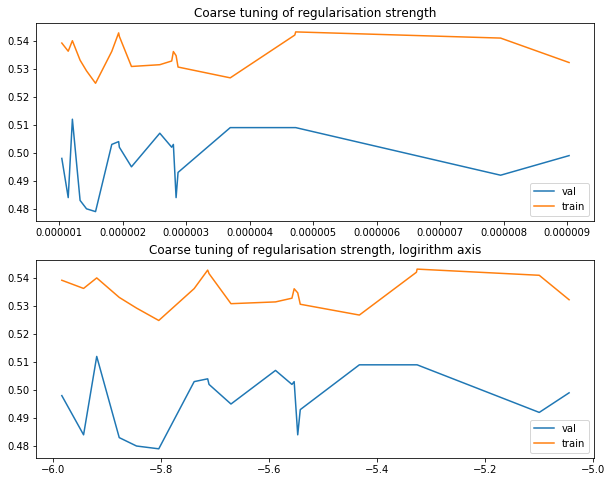

In [8]:
# 2.1 regularisation: fine search
# coarse search of reg with hidden_size = 204 (best from above)
# set range of tuning for hyperparameters
# reg_range = 10 ** np.linspace(-5, 1, 20)
reg_range = 10 ** (np.random.rand(20) - 6.0)

hidden_size_range = [204]
learning_rate_range = [1e-3]
num_epochs_range = [5]
# drop = 1  # single on/off flag
# drop_prob = 0.5


hyper_params_range = [hidden_size_range, 
                      learning_rate_range, 
                      num_epochs_range, 
                      reg_range]

# net model tuning
hyper_params_list = hyper_params_comb(hyper_params_range)
tic = time.time()
best_net, results = net_tuning(X_train, y_train, 
                               X_val, y_val, 
                               hyper_params_list, verbose=False)
toc = time.time()

# time
print()
print('Number of hyperparams to tune: %d' % len(hyper_params_list))
print('Total time used: %f (seconds)' % (toc-tic))
print('Total time per hyperparam: %f (seconds)' % (float(toc-tic)/float(len(hyper_params_list))))
print()


# visualise of results: hidden_size vs train/val accuracy
reg_axis = [hyper_params[3] for hyper_params in sorted(results)]
train_acc_history = [results[hyper_params][0] for hyper_params in sorted(results)]
val_acc_history = [results[hyper_params][1] for hyper_params in sorted(results)]

plt.subplot(2,1,1)
plt.plot(reg_axis, val_acc_history, label='val')
plt.plot(reg_axis, train_acc_history, label='train')
plt.title('Coarse tuning of regularisation strength')
plt.legend()
             
plt.subplot(2,1,2)
plt.plot(np.log10(reg_axis), val_acc_history, label='val')
plt.plot(np.log10(reg_axis), train_acc_history, label='train')
plt.title('Coarse tuning of regularisation strength, logirithm axis')
plt.legend()
plt.show()


In [ ]:
# 3. learning rate tuning

In [ ]:
# combined fine tuning

In [ ]:
# dropout

In [ ]:
# Adam